In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
Industry = pd.read_excel('Industry_Portfolios.xlsx')

/Users/jiaminglv/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
Industry.head()

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86


In [4]:
Industry_data = Industry.drop(['Date'], axis = 1)

Industry_data

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
115,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [5]:
R_Mean = pd.DataFrame(Industry_data.mean(axis = 0))

R_Mean

,0
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [6]:
V = Industry_data.cov()

V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [7]:
Std = pd.DataFrame(Industry_data.std()).T

Std

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,3.345657,8.361852,5.31027,6.081524,5.381191,4.448284,4.093786,3.787172,3.701763,5.582452


In [8]:
combined_data = pd.concat([R_Mean.T,Std])

combined_data = combined_data.reset_index().drop(['index'], axis = 1)

combined_data = combined_data.rename(index = {0:'mean',1:'std'})

combined_data

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
mean,0.902833,0.733333,1.012833,1.231167,0.766250,0.881417,0.916333,0.783833,0.907167,0.489083
std,3.345657,8.361852,5.310270,6.081524,5.381191,4.448284,4.093786,3.787172,3.701763,5.582452


In [10]:
V_inv = np.linalg.inv(V)

R = Industry_data.mean().values.reshape(10,1)

e = np.ones(10).reshape(10,1)

In [28]:
V_inv

array([[ 0.42987616,  0.02364299, -0.11228464,  0.02488242,  0.02109433,
        -0.06576008, -0.04881808, -0.11787242, -0.06302345, -0.01706207],
       [ 0.02364299,  0.09015004, -0.11170494,  0.01575693, -0.00555338,
        -0.00938045, -0.03305295,  0.03350381,  0.00998723, -0.02840085],
       [-0.11228464, -0.11170494,  0.53145685, -0.1108174 , -0.08616709,
        -0.03841071,  0.02407555, -0.02005282,  0.01293586, -0.10978581],
       [ 0.02488242,  0.01575693, -0.1108174 ,  0.07924561, -0.00377626,
         0.01130945,  0.01490084,  0.01260604, -0.045812  ,  0.01081068],
       [ 0.02109433, -0.00555338, -0.08616709, -0.00377626,  0.16225984,
        -0.02593953, -0.0651664 , -0.02309265,  0.00097481,  0.01523926],
       [-0.06576008, -0.00938045, -0.03841071,  0.01130945, -0.02593953,
         0.24932019, -0.04599885, -0.00167346, -0.07979059, -0.01417457],
       [-0.04881808, -0.03305295,  0.02407555,  0.01490084, -0.0651664 ,
        -0.04599885,  0.2923196 , -0.01206851

In [11]:
α = float(R.T @ V_inv @ e) #(0.13794323869931932)

ζ = float(R.T @ V_inv @ R) #  0.19640858464482375

δ = float(e.T @ V_inv @ e) # 0.13738759735671185)

Rmv = α/δ  # 1.0040443340832637

α,ζ,δ,Rmv

(0.1379432386993193, 0.1964085846448232, 0.137387597356712, 1.0040443340832625)

In [12]:
Rp = np.arange(0.0, 2.001,0.01)

Rp

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [13]:
Rp1 = Rp[Rp>=1]

Rp1

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  ])

In [14]:
Rp2 = Rp[Rp<=1]

Rp2

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [15]:
min_σ_1 = ((1/δ) + (δ*(Rp1 - Rmv)**2)/(ζ*δ-α**2))**0.5

min_σ_1

array([2.69795476, 2.69801592, 2.69871706, 2.70005767, 2.7020368 ,
       2.70465304, 2.70790455, 2.71178905, 2.71630382, 2.72144571,
       2.7272112 , 2.73359632, 2.74059676, 2.74820779, 2.75642438,
       2.76524112, 2.77465229, 2.78465186, 2.79523352, 2.80639068,
       2.81811651, 2.83040394, 2.84324569, 2.85663428, 2.87056206,
       2.88502123, 2.90000383, 2.9155018 , 2.93150696, 2.94801105,
       2.96500574, 2.98248264, 3.00043333, 3.01884935, 3.03772224,
       3.05704354, 3.07680481, 3.09699761, 3.11761357, 3.13864435,
       3.16008166, 3.18191728, 3.20414309, 3.226751  , 3.24973305,
       3.27308136, 3.29678814, 3.32084572, 3.34524653, 3.36998311,
       3.39504812, 3.42043435, 3.4461347 , 3.47214218, 3.49844995,
       3.52505129, 3.5519396 , 3.57910842, 3.60655139, 3.63426233,
       3.66223513, 3.69046384, 3.71894265, 3.74766584, 3.77662785,
       3.80582321, 3.8352466 , 3.86489282, 3.89475676, 3.92483347,
       3.9551181 , 3.98560589, 4.01629222, 4.04717258, 4.07824

In [16]:
min_σ_2 = ((1/δ) + (δ*(Rp2 - Rmv)**2)/(ζ*δ-α**2))**0.5

min_σ_2

array([4.96865933, 4.93381464, 4.89907462, 4.8644415 , 4.82991758,
       4.79550523, 4.76120686, 4.72702495, 4.69296205, 4.65902076,
       4.62520378, 4.59151383, 4.55795374, 4.5245264 , 4.49123477,
       4.4580819 , 4.42507089, 4.39220496, 4.35948738, 4.32692151,
       4.29451081, 4.26225882, 4.23016916, 4.19824557, 4.16649185,
       4.13491193, 4.10350981, 4.0722896 , 4.04125553, 4.01041191,
       3.97976317, 3.94931385, 3.9190686 , 3.88903217, 3.85920946,
       3.82960543, 3.80022522, 3.77107404, 3.74215726, 3.71348034,
       3.68504889, 3.65686863, 3.62894542, 3.60128523, 3.57389417,
       3.54677848, 3.51994451, 3.49339877, 3.46714787, 3.44119855,
       3.41555771, 3.39023232, 3.36522952, 3.34055654, 3.31622076,
       3.29222964, 3.26859078, 3.24531187, 3.22240071, 3.19986521,
       3.17771336, 3.15595323, 3.13459299, 3.11364085, 3.09310513,
       3.07299416, 3.05331633, 3.03408008, 3.01529386, 2.99696612,
       2.97910534, 2.96171996, 2.94481839, 2.92840902, 2.91250

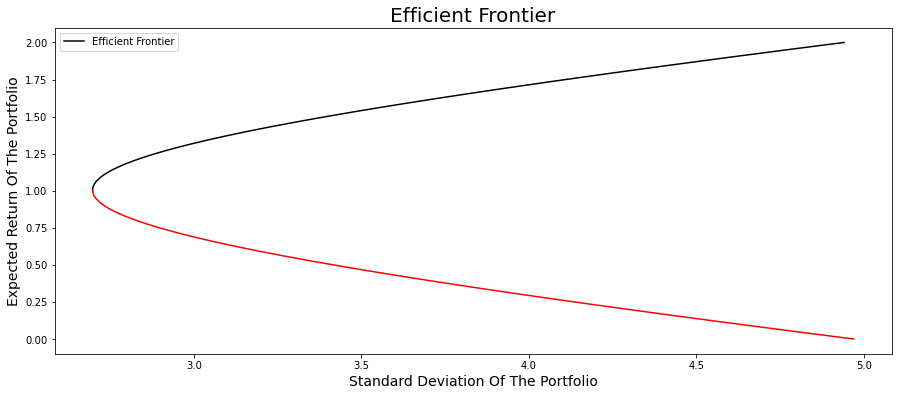

In [17]:
plt.figure(figsize = (15,6))

plt.xlabel('Standard Deviation Of The Portfolio', fontsize = 14)

plt.ylabel('Expected Return Of The Portfolio', fontsize = 14)

plt.title('Efficient Frontier', fontsize = 20)

plt.plot(min_σ_1,Rp1,color = 'k', label = 'Efficient Frontier')

plt.plot(min_σ_2, Rp2, color = 'r')

plt.legend()

# Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

#### the minimum variance frontier gives an investor the portfolio with same expected return and lowest standard deviation of the portfolio, which is also known as risk. 

In [18]:
Rf = 0.13

In [19]:
min_σ_3 = ((Rp - Rf)**2 / (ζ - 2*α*Rf+δ*Rf**2))**0.5
min_σ_3

array([0.32212855, 0.29734943, 0.27257031, 0.24779119, 0.22301207,
       0.19823295, 0.17345383, 0.14867471, 0.12389559, 0.09911648,
       0.07433736, 0.04955824, 0.02477912, 0.        , 0.02477912,
       0.04955824, 0.07433736, 0.09911648, 0.12389559, 0.14867471,
       0.17345383, 0.19823295, 0.22301207, 0.24779119, 0.27257031,
       0.29734943, 0.32212855, 0.34690767, 0.37168678, 0.3964659 ,
       0.42124502, 0.44602414, 0.47080326, 0.49558238, 0.5203615 ,
       0.54514062, 0.56991974, 0.59469886, 0.61947797, 0.64425709,
       0.66903621, 0.69381533, 0.71859445, 0.74337357, 0.76815269,
       0.79293181, 0.81771093, 0.84249005, 0.86726916, 0.89204828,
       0.9168274 , 0.94160652, 0.96638564, 0.99116476, 1.01594388,
       1.040723  , 1.06550212, 1.09028123, 1.11506035, 1.13983947,
       1.16461859, 1.18939771, 1.21417683, 1.23895595, 1.26373507,
       1.28851419, 1.31329331, 1.33807242, 1.36285154, 1.38763066,
       1.41240978, 1.4371889 , 1.46196802, 1.48674714, 1.51152

In [20]:
Rp = Rf + ((ζ - 2*α*Rf+δ*Rf**2)**0.5)*min_σ_3

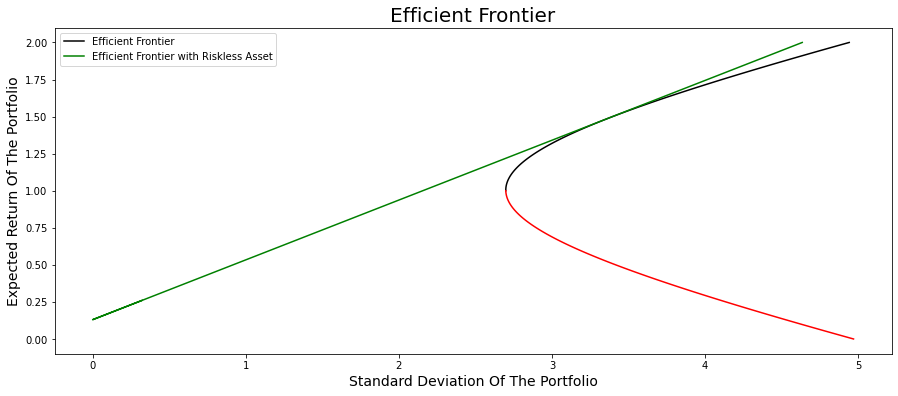

In [21]:
plt.figure(figsize = (15,6))

plt.xlabel('Standard Deviation Of The Portfolio', fontsize = 14)

plt.ylabel('Expected Return Of The Portfolio', fontsize = 14)

plt.title('Efficient Frontier', fontsize = 20)

plt.plot(min_σ_1,Rp1,color = 'k', label = 'Efficient Frontier')

plt.plot(min_σ_2, Rp2, color = 'r')

plt.plot(min_σ_3, Rp, color = 'g', label = 'Efficient Frontier with Riskless Asset')

plt.legend()

In [22]:
sharp_ratio = (ζ -2*α*Rf+δ*Rf**2)**0.5

sharp_ratio

0.40356559934950925

In [23]:
Rtg = (α*Rf - ζ) / (δ*Rf - α)
Rtg

1.4862735358446901

In [24]:
λ = (Rtg - Rf)/ (ζ - 2*α*Rf +δ*Rf**2 )

λ

8.32758375833663

In [25]:
W_tangency_portfolio = λ * V_inv @ (R - Rf*e)

In [26]:
W_tangency_portfolio

array([[ 0.56797218],
       [-0.2140726 ],
       [ 0.71410511],
       [ 0.10408719],
       [-0.36343817],
       [-0.09546326],
       [ 0.99164683],
       [ 0.0755702 ],
       [ 0.13264333],
       [-0.91305081]])